## Bank Telemarketing Campaign Case Study.

In this case study you’ll be learning Exploratory Data Analytics with the help of a case study on "Bank marketing campaign". This will enable you to understand why EDA is a most important step in the process of Machine Learning.

#### Problem Statement:

 

The bank provides financial services/products such as savings accounts, current accounts, debit cards, etc. to its customers. In order to increase its overall revenue, the bank conducts various marketing campaigns for its financial products such as credit cards, term deposits, loans, etc. These campaigns are intended for the bank’s existing customers. However, the marketing campaigns need to be cost-efficient so that the bank not only increases their overall revenues but also the total profit. You need to apply your knowledge of EDA on the given dataset to analyse the patterns and provide inferences/solutions for the future marketing campaign.

The bank conducted a telemarketing campaign for one of its financial products ‘Term Deposits’ to help foster long-term relationships with existing customers. The dataset contains information about all the customers who were contacted during a particular year to open term deposit accounts.


**What is the term Deposit?**

Term deposits also called fixed deposits, are the cash investments made for a specific time period ranging from 1 month to 5 years for predetermined fixed interest rates. The fixed interest rates offered for term deposits are higher than the regular interest rates for savings accounts. The customers receive the total amount (investment plus the interest) at the end of the maturity period. Also, the money can only be withdrawn at the end of the maturity period. Withdrawing money before that will result in an added penalty associated, and the customer will not receive any interest returns.

Your target is to do end to end EDA on this bank telemarketing campaign data set to infer knowledge that where bank has to put more effort to improve it's positive response rate. 

#### Importing the libraries.

In [1]:
#import the warnings.
import warnings 
warnings.filterwarnings("ignore")

In [2]:
#import the useful libraries.
import pandas as pd, numpy as np
import matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline

## Session- 2, Data Cleaning 

### Segment- 2, Data Types 

There are multiple types of data types available in the data set. some of them are numerical type and some of categorical type. You are required to get the idea about the data types after reading the data frame. 

Following are the some of the types of variables:
- **Numeric data type**: banking dataset: salary, balance, duration and age.
- **Categorical data type**: banking dataset: education, job, marital, poutcome and month etc.
- **Ordinal data type**: banking dataset: Age group.
- **Time and date type** 
- **Coordinates type of data**: latitude and longitude type.


#### Read in the Data set. 

In [3]:
#read the data set of "bank telemarketing campaign" in inp0.
inp0= pd.read_csv("C:/Users/sowmya.krishnan/Desktop/bank_marketing_updated_v1.csv")

In [4]:
#Print the head of the data frame.
inp0.head()

,banking marketing,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18
0,customer id and age.,NaN,Customer salary and balance.,NaN,Customer marital status and job with education...,NaN,particular customer before targeted or not,NaN,Loan types: loans or housing loans,NaN,Contact type,NaN,month of contact,duration of call,NaN,NaN,NaN,outcome of previous contact,response of customer after call happned
1,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
2,1,58,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
3,2,44,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
4,3,33,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no


### Segment- 3, Fixing the Rows and Columns 

Checklist for fixing rows:
- **Delete summary rows**: Total and Subtotal rows
- **Delete incorrect rows**: Header row and footer row
- **Delete extra rows**: Column number, indicators, Blank rows, Page No.

Checklist for fixing columns:
- **Merge columns for creating unique identifiers**, if needed, for example, merge the columns State and City into the column Full address.
- **Split columns to get more data**: Split the Address column to get State and City columns to analyse each separately. 
- **Add column names**: Add column names if missing.
- **Rename columns consistently**: Abbreviations, encoded columns.
- **Delete columns**: Delete unnecessary columns.
- **Align misaligned columns**: The data set may have shifted columns, which you need to align correctly.


#### Read the file without unnecessary headers.

In [5]:
#read the file in inp0 without first two rows as it is of no use.
inp0=  pd.read_csv("C:/Users/sowmya.krishnan/Desktop/bank_marketing_updated_v1.csv", skiprows=2)


In [6]:
#print the head of the data frame.
inp0.head()

,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,1,58.0,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
1,2,44.0,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
2,3,33.0,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no
3,4,47.0,20000,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no
4,5,33.0,0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no


#### Dropping customer id column. 

In [7]:
#drop the customer id as it is of no use.
inp0.drop("customerid", axis=1, inplace=True)
inp0.head()

,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,58.0,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
1,44.0,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
2,33.0,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no
3,47.0,20000,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no
4,33.0,0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no


#### Dividing "jobedu" column into job and education categories. 

In [8]:
#Extract job in newly created 'job' column from "jobedu" column.
inp0['job']= inp0.jobedu.apply(lambda x: x.split(",")[0])
inp0['education']= inp0.jobedu.apply(lambda x: x.split(",")[1])
inp0.head()

,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,job,education
0,58.0,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no,management,tertiary
1,44.0,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no,technician,secondary
2,33.0,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no,entrepreneur,secondary
3,47.0,20000,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no,blue-collar,unknown
4,33.0,0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no,unknown,unknown


In [10]:
# We get an error saying float object has no attributre split. 
# Let us check if it is float or not
inp0[inp0.month.apply(lambda x: isinstance(x,float)) == True]

,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,job,education
189,31.0,100000,0,single,"management,tertiary",no,no,yes,no,unknown,5,NaN,562 sec,1,-1,0,unknown,no,management,tertiary
769,39.0,20000,245,married,"blue-collar,primary",yes,no,yes,no,unknown,7,NaN,148 sec,3,-1,0,unknown,no,blue-collar,primary
860,33.0,55000,165,married,"retired,secondary",yes,no,no,no,unknown,7,NaN,111 sec,1,-1,0,unknown,no,retired,secondary
1267,36.0,50000,114,married,"admin.,secondary",yes,no,yes,yes,unknown,8,NaN,147 sec,1,-1,0,unknown,no,admin.,secondary
1685,34.0,20000,457,married,"blue-collar,secondary",yes,no,yes,no,unknown,9,NaN,266 sec,1,-1,0,unknown,no,blue-collar,secondary
1899,49.0,16000,164,divorced,"housemaid,primary",yes,no,yes,no,unknown,9,NaN,1080 sec,5,-1,0,unknown,no,housemaid,primary
2433,26.0,60000,3825,married,"technician,tertiary",yes,no,yes,no,unknown,13,NaN,107 sec,1,-1,0,unknown,no,technician,tertiary
2612,38.0,50000,446,single,"admin.,unknown",no,no,yes,no,unknown,13,NaN,386 sec,1,-1,0,unknown,no,admin.,unknown
2747,48.0,120000,2550,married,"entrepreneur,unknown",no,no,yes,no,unknown,14,NaN,175 sec,3,-1,0,unknown,no,entrepreneur,unknown
3556,41.0,20000,59,married,"blue-collar,secondary",yes,no,yes,no,unknown,15,NaN,75 sec,8,-1,0,unknown,no,blue-collar,secondary


In [11]:
#drop the "jobedu" column from the dataframe.
inp0.drop("jobedu", axis=1, inplace=True)
inp0.head()

,age,salary,balance,marital,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,job,education
0,58.0,100000,2143,married,yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no,management,tertiary
1,44.0,60000,29,single,yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no,technician,secondary
2,33.0,120000,2,married,yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no,entrepreneur,secondary
3,47.0,20000,1506,married,no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no,blue-collar,unknown
4,33.0,0,1,single,no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no,unknown,unknown


### Segment- 4, Impute/Remove missing values 

Take aways from the lecture on missing values:

- **Set values as missing values**: Identify values that indicate missing data, for example, treat blank strings, "NA", "XX", "999", etc., as missing.
- **Adding is good, exaggerating is bad**: You should try to get information from reliable external sources as much as possible, but if you can’t, then it is better to retain missing values rather than exaggerating the existing rows/columns.
- **Delete rows and columns**: Rows can be deleted if the number of missing values is insignificant, as this would not impact the overall analysis results. Columns can be removed if the missing values are quite significant in number.
- **Fill partial missing values using business judgement**: Such values include missing time zone, century, etc. These values can be identified easily.

Types of missing values:
- **MCAR**: It stands for Missing completely at random (the reason behind the missing value is not dependent on any other feature).
- **MAR**: It stands for Missing at random (the reason behind the missing value may be associated with some other features).
- **MNAR**: It stands for Missing not at random (there is a specific reason behind the missing value).


#### handling missing values in age column.

In [12]:
#count the missing values in age column.
inp0.age.isnull().sum()

20

In [13]:
#pring the shape of dataframe inp0
inp0.shape

(45211, 19)

In [14]:
#calculate the percentage of missing values in age column.
float(100.0*20/45211)

0.04423702196368141

Drop the records with age missing. 

In [15]:
#drop the records with age missing in inp0 and copy in inp1 dataframe.
inp1= inp0[~inp0.age.isnull()].copy()
inp1.shape

(45191, 19)

#### handling missing values in month column

In [17]:
#count the missing values in month column in inp1.
inp0.month.isnull().sum()

50

In [18]:
#print the percentage of each month in the data frame inp1.
inp1.month.value_counts(normalize=True)

may, 2017    0.304380
jul, 2017    0.152522
aug, 2017    0.138123
jun, 2017    0.118141
nov, 2017    0.087880
apr, 2017    0.064908
feb, 2017    0.058616
jan, 2017    0.031058
oct, 2017    0.016327
sep, 2017    0.012760
mar, 2017    0.010545
dec, 2017    0.004741
Name: month, dtype: float64

In [19]:
#find the mode of month in inp1
month_mode = inp1.month.mode()[0]
month_mode

'may, 2017'

In [20]:
# fill the missing values with mode value of month in inp1.
inp1.month.fillna(month_mode, inplace=True)
inp1.month.value_counts(normalize=True)

may, 2017    0.305149
jul, 2017    0.152353
aug, 2017    0.137970
jun, 2017    0.118010
nov, 2017    0.087783
apr, 2017    0.064836
feb, 2017    0.058551
jan, 2017    0.031024
oct, 2017    0.016309
sep, 2017    0.012746
mar, 2017    0.010533
dec, 2017    0.004735
Name: month, dtype: float64

In [21]:
#let's see the null values in the month column.
inp1.month.isnull().sum()

0

#### handling missing values in response column 

In [22]:
#count the missing values in response column in inp1.
inp1.response.isnull().sum()

30

In [23]:
#calculate the percentage of missing values in response column. 
float(100.0*30/45211)

0.06635553294552211

Target variable is better of not imputed.
- Drop the records with missing values.

In [24]:
#describe the pdays column of inp1.
inp1.pdays.describe()

count    45191.000000
mean        40.181253
std        100.074099
min         -1.000000
25%         -1.000000
50%         -1.000000
75%         -1.000000
max        871.000000
Name: pdays, dtype: float64

-1 indicates the missing values.
Missing value does not always be present as null.
How to handle it:

Objective is:
- you should ignore the missing values in the calculations
- simply make it missing - replace -1 with NaN.
- all summary statistics- mean, median etc. we will ignore the missing values of pdays.

In [25]:
#describe the pdays column with considering the -1 values.
inp1.loc[inp1.pdays<0, "pdays"] = np.NaN
inp1.pdays.describe()

count    8252.000000
mean      224.523752
std       115.202715
min         1.000000
25%       133.000000
50%       194.500000
75%       327.000000
max       871.000000
Name: pdays, dtype: float64

### Segment- 5, Handling Outliers 

Major approaches to the treat outliers:
 		
- **Imputation**
- **Deletion of outliers**
- **Binning of values**
- **Cap the outlier**


#### Age variable 

In [26]:
#describe the age variable in inp1.
inp1.age.describe()

count    45191.000000
mean        40.935651
std         10.619198
min         18.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         95.000000
Name: age, dtype: float64

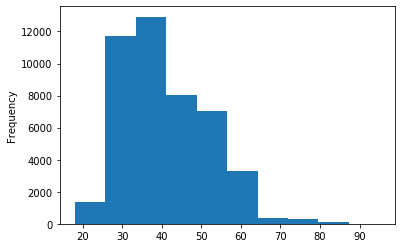

In [27]:
#plot the histogram of age variable.
inp1.age.plot.hist()

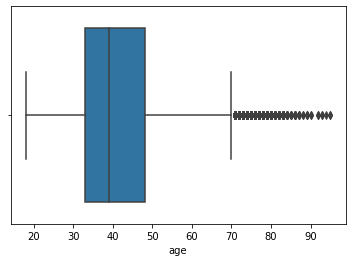

In [28]:
#plot the boxplot of age variable.
sns.boxplot(inp1.age)

#### Salary variable 

In [29]:
#describe the salary variable of inp1.
inp1.salary.describe()

count     45191.000000
mean      57005.974641
std       32084.253154
min           0.000000
25%       20000.000000
50%       60000.000000
75%       70000.000000
max      120000.000000
Name: salary, dtype: float64

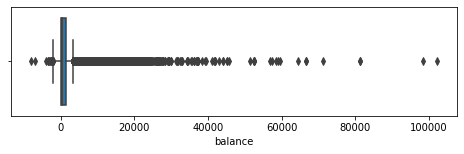

In [30]:
#plot the boxplot of salary variable.
plt.figure(figsize=[8,2])
sns.boxplot(inp1.balance)
plt.show()

#### Balance variable 

In [31]:
#describe the balance variable of inp1.
inp1.balance.describe()

count     45191.000000
mean       1362.432520
std        3045.120417
min       -8019.000000
25%          72.000000
50%         448.000000
75%        1428.000000
max      102127.000000
Name: balance, dtype: float64

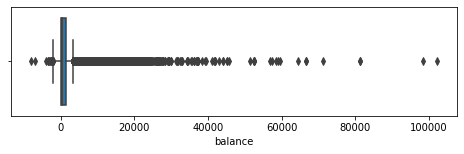

In [33]:
#plot the boxplot of balance variable.
plt.figure(figsize=[8,2])
sns.boxplot(inp1.balance)
plt.show()

In [34]:
#print the quantile (0.5, 0.7, 0.9, 0.95 and 0.99) of balance variable
inp1.balance.quantile([0.5, 0.7, 0.9, 0.95, 0.99])

0.50      448.0
0.70     1126.0
0.90     3575.0
0.95     5768.0
0.99    13167.1
Name: balance, dtype: float64

In [35]:
inp1[inp1.balance>15000].describe()

,age,salary,balance,day,campaign,pdays,previous
count,351.000000,351.000000,351.000000,351.000000,351.000000,62.000000,351.000000
mean,45.341880,70008.547009,24295.780627,16.022792,2.749288,188.516129,0.555556
std,12.114333,34378.272805,12128.560693,8.101819,3.036886,118.796388,1.784590
min,23.000000,0.000000,15030.000000,1.000000,1.000000,31.000000,0.000000
25%,35.000000,50000.000000,17074.000000,9.000000,1.000000,96.250000,0.000000
50%,44.000000,60000.000000,20723.000000,18.000000,2.000000,167.500000,0.000000
75%,55.000000,100000.000000,26254.000000,21.000000,3.000000,246.500000,0.000000
max,84.000000,120000.000000,102127.000000,31.000000,31.000000,589.000000,23.000000


### Segment- 6, Standardising values 

Checklist for data standardization exercises:
- **Standardise units**: Ensure all observations under one variable are expressed in a common and consistent unit, e.g., convert lbs to kg, miles/hr to km/hr, etc.
- **Scale values if required**: Make sure all the observations under one variable have a common scale.
- **Standardise precision** for better presentation of data, e.g., change 4.5312341 kg to 4.53 kg.
- **Remove extra characters** such as common prefixes/suffixes, leading/trailing/multiple spaces, etc. These are irrelevant to analysis.
- **Standardise case**: String variables may take various casing styles, e.g., UPPERCASE, lowercase, Title Case, Sentence case, etc.
- **Standardise format**: It is important to standardise the format of other elements such as date, name, etce.g., change 23/10/16 to 2016/10/23, “Modi, Narendra” to “Narendra Modi", etc.

#### Duration variable

In [36]:
#describe the duration variable of inp1
inp1.duration.head(10)

0    261 sec
1    151 sec
2     76 sec
3     92 sec
4    198 sec
5    139 sec
6    217 sec
7    380 sec
8     50 sec
9     55 sec
Name: duration, dtype: object

In [37]:
inp1.duration.describe()

count       45191
unique       2646
top       1.5 min
freq          138
Name: duration, dtype: object

In [38]:
#convert the duration variable into single unit i.e. minutes. and remove the sec or min prefix.
inp1.duration.apply(lambda x: float(x.split()[0])/60 if x.find("sec")>0 else float(x.split()[0]))

0         4.350000
1         2.516667
2         1.266667
3         1.533333
4         3.300000
5         2.316667
6         3.616667
7         6.333333
8         0.833333
9         0.916667
10        3.700000
11        2.283333
12        8.616667
13        1.183333
14        2.900000
15        5.883333
16        1.633333
17        0.633333
18        3.650000
19        0.900000
20        4.366667
21        2.733333
22        2.666667
23        5.700000
24        3.016667
25        2.866667
26        4.933333
27        2.116667
28        4.250000
29        5.800000
           ...    
45181     1.233333
45182     6.683333
45183     1.300000
45184     2.300000
45185     3.333333
45186     4.666667
45187     6.850000
45188     3.933333
45189     2.883333
45190     3.433333
45191     4.366667
45192     3.966667
45193     7.483333
45194     2.700000
45195     3.533333
45196     5.500000
45197     4.500000
45198     5.550000
45199    19.433333
45200    25.933333
45201     3.766667
45202     3.

In [39]:
#describe the duration variable
inp1.duration.describe()

count       45191
unique       2646
top       1.5 min
freq          138
Name: duration, dtype: object

## Session- 3, Univariate Analysis 

### Segment- 2, Categorical unordered univariate analysis 

Unordered data do not have the notion of high-low, more-less etc. Example:
- Type of loan taken by a person = home, personal, auto etc.
- Organisation of a person = Sales, marketing, HR etc.
- Job category of persone.
- Marital status of any one.


#### Marital status 

In [40]:
inp1.dtypes

age          float64
salary         int64
balance        int64
marital       object
targeted      object
default       object
housing       object
loan          object
contact       object
day            int64
month         object
duration      object
campaign       int64
pdays        float64
previous       int64
poutcome      object
response      object
job           object
education     object
dtype: object

In [91]:
inp1.marital.value_counts()

married     27204
single      12786
divorced     5201
Name: marital, dtype: int64

In [41]:
#calculate the percentage of each marital status category. 
inp1.marital.value_counts(normalize=True)

married     0.601978
single      0.282932
divorced    0.115089
Name: marital, dtype: float64

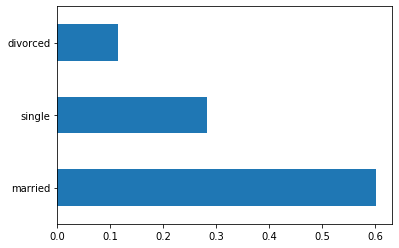

In [42]:
#plot the bar graph of percentage marital status categories
inp1.marital.value_counts(normalize=True).plot.barh()
plt.show()

#### Job  

In [43]:
#calculate the percentage of each job status category.
inp1.job.value_counts(normalize=True)

blue-collar      0.215242
management       0.209223
technician       0.168042
admin.           0.114403
services         0.091877
retired          0.050076
self-employed    0.034918
entrepreneur     0.032861
unemployed       0.028811
housemaid        0.027417
student          0.020756
unknown          0.006373
Name: job, dtype: float64

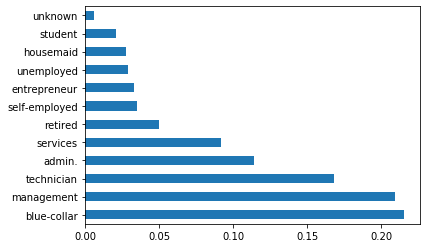

In [44]:
#plot the bar graph of percentage job categories
inp1.job.value_counts(normalize=True).plot.barh()
plt.show()

### Segment- 3, Categorical ordered univariate analysis 

Ordered variables have some kind of ordering. Some examples of bank marketing dataset are:
- Age group= <30, 30-40, 40-50 and so on.
- Month = Jan-Feb-Mar etc.
- Education = primary, secondary and so on.

#### Education

In [45]:
#calculate the percentage of each education category.
inp1.education.value_counts(normalize=True)

secondary    0.513222
tertiary     0.294196
primary      0.151490
unknown      0.041092
Name: education, dtype: float64

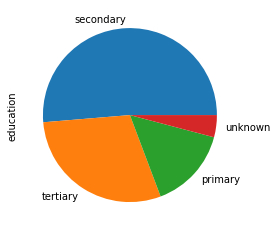

In [46]:
#plot the pie chart of education categories
inp1.education.value_counts(normalize=True).plot.pie()
plt.show()

#### poutcome 

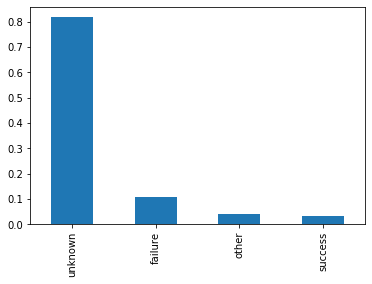

In [47]:
#calculate the percentage of each poutcome category.
inp1.poutcome.value_counts(normalize=True).plot.bar()
plt.show()

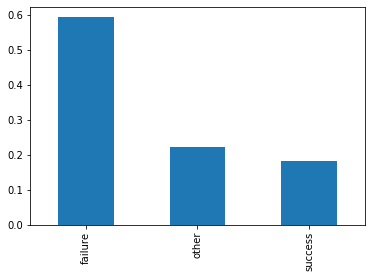

In [49]:
inp1[~(inp1.poutcome=="unknown")].poutcome.value_counts(normalize=True).plot.bar() # have done this where poutcome is not unknown
plt.show()

#### Response the target variable 

In [50]:
#calculate the percentage of each response category.
inp1.response.value_counts(normalize=True)

no     0.882974
yes    0.117026
Name: response, dtype: float64

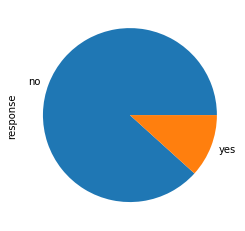

In [51]:
#plot the pie chart of response categories
inp1.response.value_counts(normalize=True).plot.pie()
plt.show()

## Session- 4, Bivariate and Multivariate Analysis

### Segment-2, Numeric- numeric analysis 

There are three ways to analyse the numeric- numeric data types simultaneously.
- **Scatter plot**: describes the pattern that how one variable is varying with other variable.
- **Correlation matrix**: to describe the linearity of two numeric variables.
- **Pair plot**: group of scatter plots of all numeric variables in the data frame.

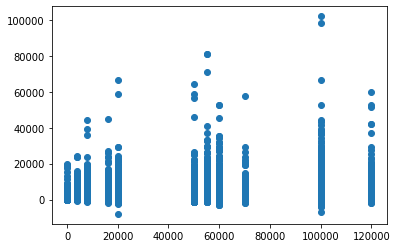

In [52]:
#plot the scatter plot of balance and salary variable in inp1
plt.scatter(inp1.salary, inp1.balance)
plt.show()

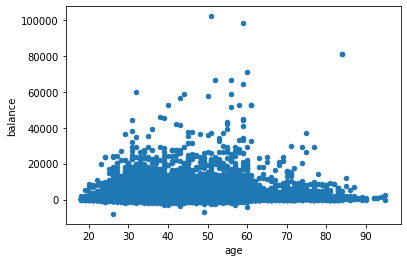

In [53]:
#plot the scatter plot of balance and age variable in inp1
inp1.plot.scatter(x="age", y="balance")
plt.show()

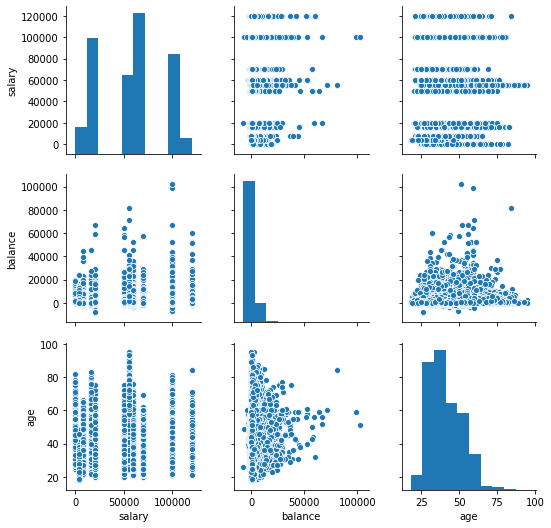

In [54]:
#plot the pair plot of salary, balance and age in inp1 dataframe.
sns.pairplot(data=inp1, vars=["salary", "balance", "age"])
plt.show()

#### Correlation heat map 

In [55]:
#plot the correlation matrix of salary, balance and age in inp1 dataframe.
inp1[["age", "salary", "balance"]].corr()

,age,salary,balance
age,1.000000,0.024374,0.097755
salary,0.024374,1.000000,0.055505
balance,0.097755,0.055505,1.000000


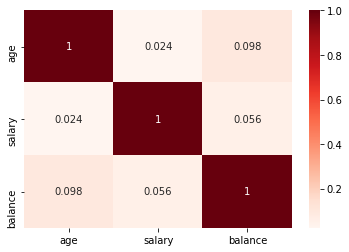

In [56]:
sns.heatmap(inp1[["age", "salary", "balance"]].corr(), annot=True, cmap="Reds")
plt.show()

### Segment- 4, Numerical categorical variable

#### Salary vs response 

In [58]:
#groupby the response to find the mean of the salary with response no & yes seperatly.
inp1.groupby("response")['salary'].mean()

response
no     56769.510482
yes    58780.510880
Name: salary, dtype: float64

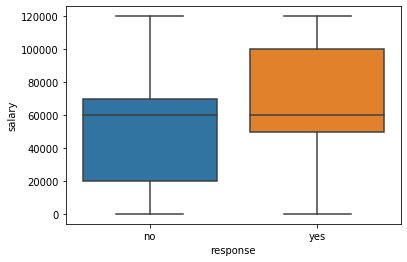

In [59]:
#plot the box plot of salary for yes & no responses.
sns.boxplot(data=inp1, x= "response", y="salary")
plt.show()

#### Balance vs response 

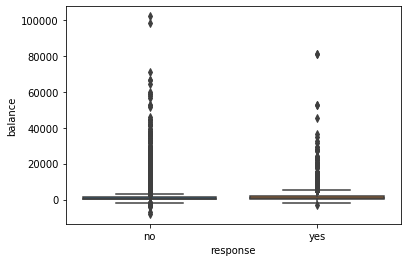

In [60]:
#plot the box plot of balance for yes & no responses.
sns.boxplot(data=inp1, x="response", y="balance")
plt.show()

In [61]:
#groupby the response to find the mean of the balance with response no & yes seperatly.
inp1.groupby('response')['balance'].mean()

response
no     1304.292281
yes    1804.681362
Name: balance, dtype: float64

In [62]:
#groupby the response to find the median of the balance with response no & yes seperatly.
inp1.groupby('response')['balance'].median()

response
no     417
yes    733
Name: balance, dtype: int64

##### 75th percentile 

In [65]:
#function to find the 75th percentile.
def p75(x):
    return np.quantile(x, 0.75)

In [66]:
#calculate the mean, median and 75th percentile of balance with response
inp1.groupby('response')['balance'].aggregate(["mean", "median", p75])

,mean,median,p75
response,,,
no,1304.292281,417,1345
yes,1804.681362,733,2159


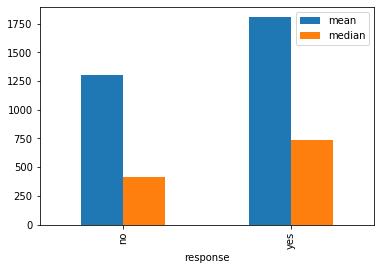

In [68]:
#plot the bar graph of balance's mean an median with response.
inp1.groupby('response')['balance'].aggregate(["mean", "median"]).plot.bar()

In [70]:
#create response_flag of numerical data type where response "yes"= 1, "no"= 0
inp1['response_flag'] = np.where(inp1.response=="yes",1,0)
inp1.response_flag.value_counts()

0    39906
1     5285
Name: response_flag, dtype: int64

#### Education vs response rate

In [72]:
#calculate the mean of response_flag with different education categories.
inp1.groupby(['education'])['response_flag'].mean()

education
primary      0.086328
secondary    0.105549
tertiary     0.149981
unknown      0.135703
Name: response_flag, dtype: float64

#### Marital vs response rate 

In [73]:
#calculate the mean of response_flag with different marital status categories.
inp1.groupby(['marital'])['response_flag'].mean()

marital
divorced    0.119400
married     0.101198
single      0.149460
Name: response_flag, dtype: float64

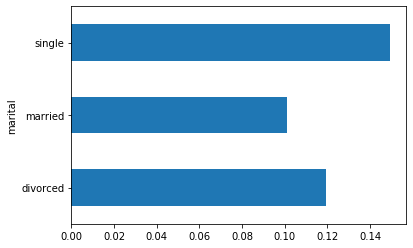

In [75]:
#plot the bar graph of marital status with average value of response_flag
inp1.groupby(['marital'])['response_flag'].mean().plot.barh()

#### Loans vs response rate 

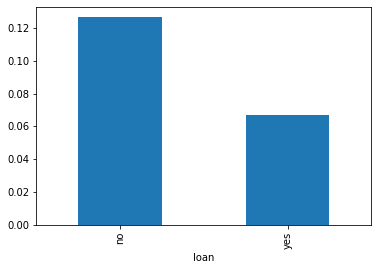

In [77]:
#plot the bar graph of personal loan status with average value of response_flag
inp1.groupby(['loan'])['response_flag'].mean().plot.bar()

#### Housing loans vs response rate 

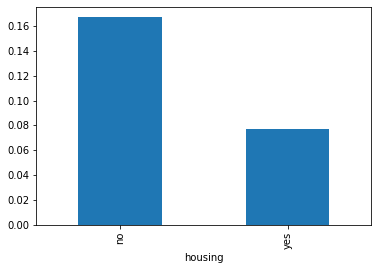

In [78]:
#plot the bar graph of housing loan status with average value of response_flag
inp1.groupby(['housing'])['response_flag'].mean().plot.bar()

#### Age vs response 

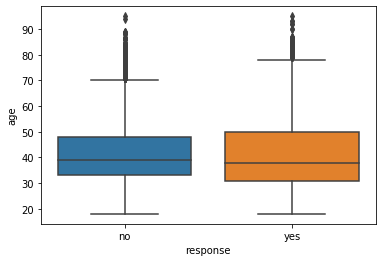

In [79]:
#plot the boxplot of age with response_flag
sns.boxplot(data=inp1, x="response", y="age")
plt.show()

##### making buckets from age columns 

In [84]:
#create the buckets of <30, 30-40, 40-50 50-60 and 60+ from age column.
inp1['age_group'] = pd.cut(inp1.age[:5], [0,30,40,50,60,9999], labels=["<30", "30-40", "40-50", "50-60", "60+"])

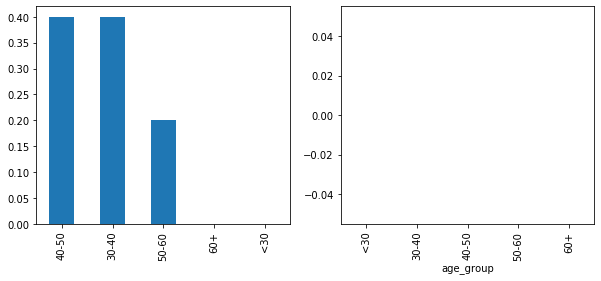

In [89]:
#plot the percentage of each buckets and average values of response_flag in each buckets. plot in subplots.
plt.figure(figsize=[10,4])
plt.subplot(121)
inp1.age_group.value_counts(normalize=True).plot.bar()
plt.subplot(122)
inp1.groupby(['age_group'])['response_flag'].mean().plot.bar()
plt.show()

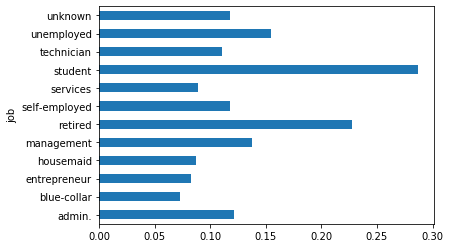

In [88]:
#plot the bar graph of job categories with response_flag mean value.
inp1.groupby('job')['response_flag'].mean().plot.barh()
plt.show()

### Segment-6, Multivariate analysis 

#### Education vs marital vs response 

In [93]:
#create heat map of education vs marital vs response_flag
res = pd.pivot_table(data=inp1, index="education", columns="marital", values="response_flag")
res

marital,divorced,married,single
education,,,
primary,0.138667,0.075515,0.106808
secondary,0.103485,0.094595,0.129213
tertiary,0.137415,0.129761,0.183546
unknown,0.142012,0.122414,0.162879


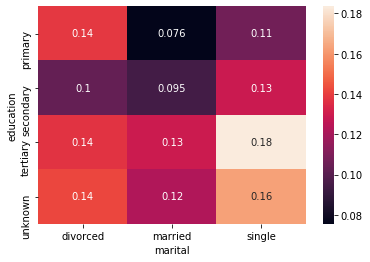

In [94]:
sns.heatmap(res, annot=True)

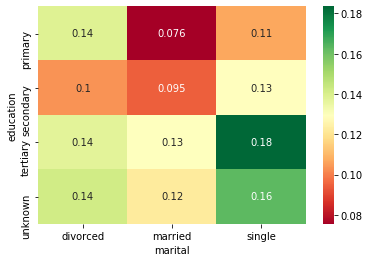

In [95]:
sns.heatmap(res, annot=True, cmap="RdYlGn")

#### Job vs marital vs response 

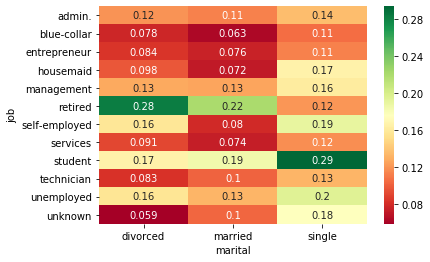

In [96]:
#create the heat map of Job vs marital vs response_flag.
res1 = pd.pivot_table(data=inp1, index="job", columns="marital", values="response_flag")
sns.heatmap(res1, annot=True, cmap="RdYlGn")

#### Education vs poutcome vs response

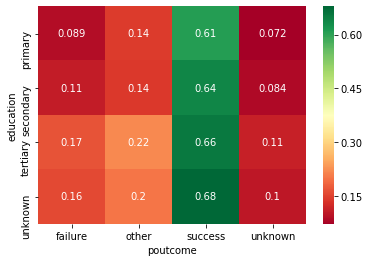

In [97]:
#create the heat map of education vs poutcome vs response_flag.
res2 = pd.pivot_table(data=inp1, index="education", columns="poutcome", values="response_flag")
sns.heatmap(res2, annot=True, cmap="RdYlGn")